In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [325]:
def tri_liste(liste1,liste2) :
    indices_trie = sorted(range(len(liste1)), key=lambda i: liste1[i])

    liste1_triee = [liste1[i] for i in indices_trie]
    liste2_triee = [liste2[i] for i in indices_trie]
    return liste1_triee,liste2_triee

### Recupération des valeurs de n pour chacun des niveaux de bruit

In [326]:
nb_test = 1000

In [327]:
def recuperer_element_liste(nom_fichier,bruit) :
    with open(nom_fichier,'r') as fichier :
        lignes = fichier.readlines()

    liste1 = [int(element.split()[0]) for element in lignes[bruit*nb_test:(bruit+1)*nb_test]]
    liste2 = [int(element.split()[1]) for element in lignes[bruit*nb_test:(bruit+1)*nb_test]]
    liste_n,liste_succes = tri_liste(liste1,liste2)

    return liste_n,liste_succes


### Retrouvaille des quartiles et du pourcentage de succès en fonction des valeurs de n

In [328]:
def trouver_quartile(data) :
    Q1 = np.percentile(data, 25)  
    Q2 = np.percentile(data, 50) 
    Q3 = np.percentile(data, 75) 
    return int(Q1),int(Q2),int(Q3)

# Version avec succes et echec
def pourcentage_succes(donnes,donnes_succes,quartiles) :
    liste_succes =[]
    for quartile in quartiles :
        succes = 0
        nb_element = 0
        for i in range(1000) :
            if (donnes[i] < quartile) :
                succes+=donnes_succes[i]
                nb_element+=1
        liste_succes.append(round((succes/nb_element),2))
    return liste_succes

# Version avec nombre de bits
def pourcentage_succes_nb_bits(donnes,donnes_succes,quartiles) :
    liste_succes =[]
    for quartile in quartiles :
        succes = 0
        nb_element = 0
        for i in range(1000) :
            if (donnes[i] < quartile) :
                if(donnes_succes[i] > 256) :
                    succes+=1
                nb_element+=1
        liste_succes.append(round((succes/nb_element),2))
    return liste_succes
    

### Version avec uniquement succès & échec

In [329]:
liste_n_bruit_0,liste_succes_bruit_0 = recuperer_element_liste("stats_probabilite",0)
liste_n_bruit_1,liste_succes_bruit_1 = recuperer_element_liste("stats_probabilite",1)
liste_n_bruit_2,liste_succes_bruit_2 = recuperer_element_liste("stats_probabilite",2)
liste_n_bruit_3,liste_succes_bruit_3 = recuperer_element_liste("stats_probabilite",3)
liste_n_bruit_4,liste_succes_bruit_4 = recuperer_element_liste("stats_probabilite",4)
liste_n_bruit_5,liste_succes_bruit_5 = recuperer_element_liste("stats_probabilite",5)

#### Sans bruit

In [330]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_0)
succes_q1_bruit_0,succes_q2_bruit_0,succes_q3_bruit_0,succes_global_bruit_0 = pourcentage_succes(liste_n_bruit_0,liste_succes_bruit_0,[Q1,Q2,Q3,9999999])
print(Q1,Q2,Q3)
print(succes_q1_bruit_0,succes_q2_bruit_0,succes_q3_bruit_0,succes_global_bruit_0)

52 129 257
0.32 0.66 0.77 0.83


#### Bruit de 1

In [331]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_1)
succes_q1_bruit_1,succes_q2_bruit_1,succes_q3_bruit_1,succes_global_bruit_1 = pourcentage_succes(liste_n_bruit_1,liste_succes_bruit_1,[Q1,Q2,Q3,9999999])
print(Q1,Q2,Q3)
print(succes_q1_bruit_1,succes_q2_bruit_1,succes_q3_bruit_1,succes_global_bruit_1)

55 128 244
0.07 0.45 0.64 0.73


#### Bruit de 2

In [332]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_1)
succes_q1_bruit_2,succes_q2_bruit_2,succes_q3_bruit_2,succes_global_bruit_2 = pourcentage_succes(liste_n_bruit_2,liste_succes_bruit_2,[Q1,Q2,Q3,9999999])
print(Q1,Q2,Q3)
print(succes_q1_bruit_2,succes_q2_bruit_2,succes_q3_bruit_2,succes_global_bruit_2)

55 128 244
0.0 0.1 0.35 0.52


#### Bruit de 3

In [333]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_3)
succes_q1_bruit_3,succes_q2_bruit_3,succes_q3_bruit_3,succes_global_bruit_3 = pourcentage_succes(liste_n_bruit_3,liste_succes_bruit_3,[Q1,Q2,Q3,9999999])
print(Q1,Q2,Q3)
print(succes_q1_bruit_3,succes_q2_bruit_3,succes_q3_bruit_3,succes_global_bruit_3)

50 119 233
0.0 0.0 0.07 0.29


#### Bruit de 4

In [334]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_4)
succes_q1_bruit_4,succes_q2_bruit_4,succes_q3_bruit_4,succes_global_bruit_4 = pourcentage_succes(liste_n_bruit_4,liste_succes_bruit_4,[Q1,Q2,Q3,9999999])
print(Q1,Q2,Q3)
print(succes_q1_bruit_4,succes_q2_bruit_4,succes_q3_bruit_4,succes_global_bruit_4)

50 127 245
0.0 0.0 0.0 0.13


#### Bruit de 5

In [335]:
Q1,Q2,Q3 = trouver_quartile(liste_n_bruit_5)
succes_q1_bruit_5,succes_q2_bruit_5,succes_q3_bruit_5,succes_global_bruit_5 = pourcentage_succes(liste_n_bruit_5,liste_succes_bruit_5,[Q1,Q2,Q3,9999999])
print(Q1,Q2,Q3)
print(succes_q1_bruit_5,succes_q2_bruit_5,succes_q3_bruit_5,succes_global_bruit_5)

45 115 258
0.0 0.0 0.0 0.04


#### Version avec le nombre de bits récupérés

In [337]:
liste2_n_bruit_0,liste_nb_bits_bruit_0 = recuperer_element_liste("stats_probabilite_2",0)
liste2_n_bruit_1,liste_nb_bits_bruit_1 = recuperer_element_liste("stats_probabilite_2",1)
liste2_n_bruit_2,liste_nb_bits_bruit_2 = recuperer_element_liste("stats_probabilite_2",2)
liste2_n_bruit_3,liste_nb_bits_bruit_3 = recuperer_element_liste("stats_probabilite_2",3)
liste2_n_bruit_4,liste_nb_bits_bruit_4 = recuperer_element_liste("stats_probabilite_2",4)
liste2_n_bruit_5,liste_nb_bits_bruit_5 = recuperer_element_liste("stats_probabilite_2",5)

#### Bruit de 0

In [338]:
Q1_0,Q2_0,Q3_0 = trouver_quartile(liste2_n_bruit_0)
succes_nb_bits_q1_bruit_0,succes_nb_bits_q2_bruit_0,succes_nb_bits_q3_bruit_0,succes_nb_bits_global_bruit_0 = pourcentage_succes_nb_bits(liste2_n_bruit_0,liste_nb_bits_bruit_0,[Q1_0,Q2_0,Q3_0,9999999])
print(Q1_0,Q2_0,Q3_0)
print(succes_nb_bits_q1_bruit_0,succes_nb_bits_q2_bruit_0,succes_nb_bits_q3_bruit_0,succes_nb_bits_global_bruit_0)

52 129 257
0.7 0.85 0.9 0.93


#### Bruit de 1

In [339]:
Q1_1,Q2_1,Q3_1 = trouver_quartile(liste2_n_bruit_0)
succes_nb_bits_q1_bruit_1,succes_nb_bits_q2_bruit_1,succes_nb_bits_q3_bruit_1,succes_nb_bits_global_bruit_1 = pourcentage_succes_nb_bits(liste2_n_bruit_1,liste_nb_bits_bruit_1,[Q1_1,Q2_1,Q3_1,9999999])
print(Q1_1,Q2_1,Q3_1)
print(succes_nb_bits_q1_bruit_1,succes_nb_bits_q2_bruit_1,succes_nb_bits_q3_bruit_1,succes_nb_bits_global_bruit_1)

52 129 257
0.46 0.75 0.84 0.88


#### Bruit de 2

In [340]:
Q1_2,Q2_2,Q3_2 = trouver_quartile(liste2_n_bruit_0)
succes_nb_bits_q1_bruit_2,succes_nb_bits_q2_bruit_2,succes_nb_bits_q3_bruit_2,succes_nb_bits_global_bruit_2 = pourcentage_succes_nb_bits(liste2_n_bruit_2,liste_nb_bits_bruit_2,[Q1_2,Q2_2,Q3_2,9999999])
print(Q1_2,Q2_2,Q3_2)
print(succes_nb_bits_q1_bruit_2,succes_nb_bits_q2_bruit_2,succes_nb_bits_q3_bruit_2,succes_nb_bits_global_bruit_2)

52 129 257
0.0 0.46 0.63 0.72


#### Bruit de 3

In [341]:
Q1_3,Q2_3,Q3_3 = trouver_quartile(liste2_n_bruit_3)
succes_nb_bits_q1_bruit_3,succes_nb_bits_q2_bruit_3,succes_nb_bits_q3_bruit_3,succes_nb_bits_global_bruit_3 = pourcentage_succes_nb_bits(liste2_n_bruit_3,liste_nb_bits_bruit_3,[Q1_3,Q2_3,Q3_3,9999999])
print(Q1_3,Q2_3,Q3_3)
print(succes_nb_bits_q1_bruit_0,succes_nb_bits_q2_bruit_3,succes_nb_bits_q3_bruit_3,succes_nb_bits_global_bruit_3)

50 119 233
0.7 0.11 0.4 0.55


#### Bruit de 4

In [342]:
Q1_4,Q2_4,Q3_4 = trouver_quartile(liste2_n_bruit_4)
succes_nb_bits_q1_bruit_4,succes_nb_bits_q2_bruit_4,succes_nb_bits_q3_bruit_4,succes_nb_bits_global_bruit_4 = pourcentage_succes_nb_bits(liste2_n_bruit_4,liste_nb_bits_bruit_4,[Q1_4,Q2_4,Q3_4,9999999])
print(Q1_4,Q2_4,Q3_4)
print(succes_nb_bits_q1_bruit_4,succes_nb_bits_q2_bruit_4,succes_nb_bits_q3_bruit_4,succes_nb_bits_global_bruit_4)

50 127 245
0.0 0.0 0.23 0.42


#### Bruit de 5

In [343]:
Q1_5,Q2_5,Q3_5 = trouver_quartile(liste2_n_bruit_5)
succes_nb_bits_q1_bruit_5,succes_nb_bits_q2_bruit_5,succes_nb_bits_q3_bruit_5,succes_nb_bits_global_bruit_5 = pourcentage_succes_nb_bits(liste2_n_bruit_5,liste_nb_bits_bruit_5,[Q1_5,Q2_5,Q3_5,9999999])
print(Q1_5,Q2_5,Q3_5)
print(succes_nb_bits_q1_bruit_5,succes_nb_bits_q2_bruit_5,succes_nb_bits_q3_bruit_5,succes_nb_bits_global_bruit_5)

45 115 258
0.0 0.0 0.02 0.25


### Tableaux récapitulatif

### Pour la version succès / echec

In [357]:
tableau = pd.DataFrame({
    'Q1': [succes_q1_bruit_0,succes_q1_bruit_1,succes_q1_bruit_2,succes_q1_bruit_3,succes_q1_bruit_4,succes_q1_bruit_5],
    'Q2': [succes_q2_bruit_0,succes_q2_bruit_1,succes_q2_bruit_2,succes_q2_bruit_3,succes_q2_bruit_4,succes_q2_bruit_5],
    'Q3': [succes_q3_bruit_0,succes_q3_bruit_1,succes_q3_bruit_2,succes_q3_bruit_3,succes_q3_bruit_4,succes_q3_bruit_5]
},[i for i in range(6)]).round(2)
tableau.index.name = "σ"
tableau

,Q1,Q2,Q3
σ,,,
0,0.32,0.66,0.77
1,0.07,0.45,0.64
2,0.00,0.10,0.35
3,0.00,0.00,0.07
4,0.00,0.00,0.00
5,0.00,0.00,0.00


### Version nombre de bits récupérés

In [344]:
tableau = pd.DataFrame({
    'Q1': [succes_nb_bits_q1_bruit_0,succes_nb_bits_q1_bruit_1,succes_nb_bits_q1_bruit_2,succes_nb_bits_q1_bruit_3,succes_nb_bits_q1_bruit_4,succes_nb_bits_q1_bruit_5],
    'Q2': [succes_nb_bits_q2_bruit_0,succes_nb_bits_q2_bruit_1,succes_nb_bits_q2_bruit_2,succes_nb_bits_q2_bruit_3,succes_nb_bits_q2_bruit_4,succes_nb_bits_q2_bruit_5],
    'Q3': [succes_nb_bits_q3_bruit_0,succes_nb_bits_q3_bruit_1,succes_nb_bits_q3_bruit_2,succes_nb_bits_q3_bruit_3,succes_nb_bits_q3_bruit_4,succes_nb_bits_q3_bruit_5]
},[i for i in range(6)]).round(2)
tableau.index.name = "σ"
tableau

,Q1,Q2,Q3
σ,,,
0,0.70,0.85,0.90
1,0.46,0.75,0.84
2,0.00,0.46,0.63
3,0.00,0.11,0.40
4,0.00,0.00,0.23
5,0.00,0.00,0.02


### Distribution cumulative du nombre d'ittérations

In [345]:
def probabilite(valeur,liste) :
    nb_valeur = 0
    for i in range (len(liste)) :
        if(valeur <= liste[i]) :
            nb_valeur+=1
    return nb_valeur/len(liste) * 100

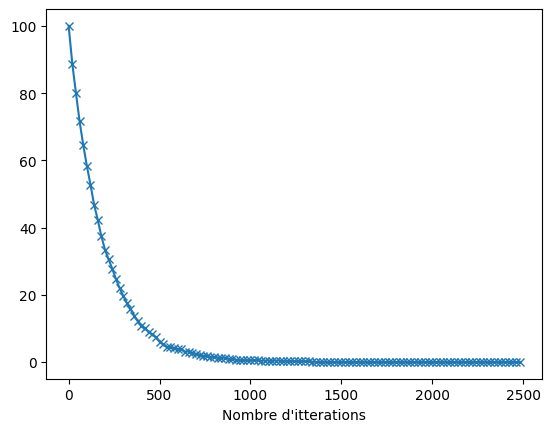

In [346]:
x = [i for i in range (0,2500,20)]
y = [probabilite(element,liste_n_bruit_0) for element in x]
plt.xlabel("Nombre d'itterations")

plt.plot(x,y,marker="x")

### Affichage du nombre de bits retrouvé

In [347]:
x = [i for i in range(0,350,7)]


liste_nb_bits_bruit_0_q1 = [liste_nb_bits_bruit_0[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_0[i] < Q1_0]
liste_nb_bits_bruit_1_q1 = [liste_nb_bits_bruit_1[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_1[i] < Q1_0]
liste_nb_bits_bruit_2_q1 = [liste_nb_bits_bruit_2[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_2[i] < Q1_0]
liste_nb_bits_bruit_3_q1 = [liste_nb_bits_bruit_3[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_3[i] < Q1_0]
liste_nb_bits_bruit_4_q1 = [liste_nb_bits_bruit_4[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_4[i] < Q1_0]
liste_nb_bits_bruit_5_q1 = [liste_nb_bits_bruit_5[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_5[i] < Q1_0]

liste_nb_bits_bruit_0_q2 = [liste_nb_bits_bruit_0[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_0[i] < Q2_0]
liste_nb_bits_bruit_1_q2 = [liste_nb_bits_bruit_1[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_1[i] < Q2_0]
liste_nb_bits_bruit_2_q2 = [liste_nb_bits_bruit_2[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_2[i] < Q2_0]
liste_nb_bits_bruit_3_q2 = [liste_nb_bits_bruit_3[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_3[i] < Q2_0]
liste_nb_bits_bruit_4_q2 = [liste_nb_bits_bruit_4[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_4[i] < Q2_0]
liste_nb_bits_bruit_5_q2 = [liste_nb_bits_bruit_5[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_5[i] < Q2_0]

liste_nb_bits_bruit_0_q3 = [liste_nb_bits_bruit_0[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_0[i] < Q3_0]
liste_nb_bits_bruit_1_q3 = [liste_nb_bits_bruit_1[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_1[i] < Q3_0]
liste_nb_bits_bruit_2_q3 = [liste_nb_bits_bruit_2[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_2[i] < Q3_0]
liste_nb_bits_bruit_3_q3 = [liste_nb_bits_bruit_3[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_3[i] < Q3_0]
liste_nb_bits_bruit_4_q3 = [liste_nb_bits_bruit_4[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_4[i] < Q3_0]
liste_nb_bits_bruit_5_q3 = [liste_nb_bits_bruit_5[i] for i in range (len(liste_nb_bits_bruit_0)) if liste2_n_bruit_5[i] < Q3_0]


### Quartile Q1

In [348]:
bruit_0_q1 = [probabilite(i,liste_nb_bits_bruit_0_q1) for i in x]
bruit_1_q1 = [probabilite(i,liste_nb_bits_bruit_1_q1) for i in x]
bruit_2_q1 = [probabilite(i,liste_nb_bits_bruit_2_q1) for i in x]
bruit_3_q1 = [probabilite(i,liste_nb_bits_bruit_3_q1) for i in x]
bruit_4_q1 = [probabilite(i,liste_nb_bits_bruit_4_q1) for i in x]
bruit_5_q1 = [probabilite(i,liste_nb_bits_bruit_5_q1) for i in x]

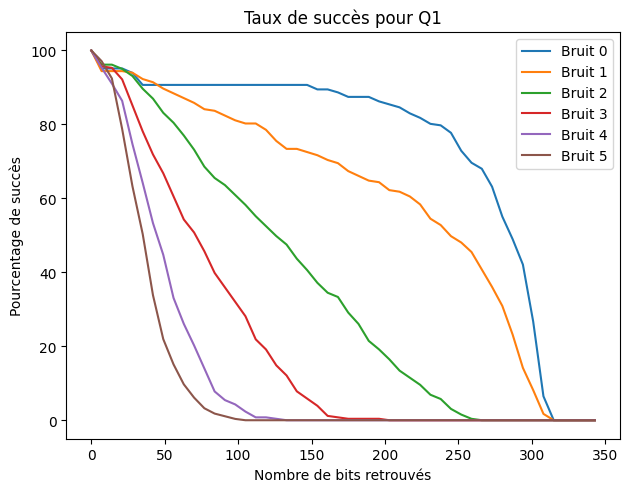

In [349]:
plt.plot(x,bruit_0_q1,label = "Bruit 0")
plt.plot(x,bruit_1_q1,label = "Bruit 1")
plt.plot(x,bruit_2_q1,label = "Bruit 2")
plt.plot(x,bruit_3_q1,label = "Bruit 3")
plt.plot(x,bruit_4_q1,label = "Bruit 4")
plt.plot(x,bruit_5_q1,label = "Bruit 5")

plt.xlabel("Nombre de bits retrouvés")
plt.ylabel("Pourcentage de succès")
plt.legend()
plt.tight_layout()
plt.title("Taux de succès pour Q1")

plt.show()

### Quartile Q2

In [350]:
bruit_0_q2 = [probabilite(i,liste_nb_bits_bruit_0_q2) for i in x]
bruit_1_q2 = [probabilite(i,liste_nb_bits_bruit_1_q2) for i in x]
bruit_2_q2 = [probabilite(i,liste_nb_bits_bruit_2_q2) for i in x]
bruit_3_q2 = [probabilite(i,liste_nb_bits_bruit_3_q2) for i in x]
bruit_4_q2 = [probabilite(i,liste_nb_bits_bruit_4_q2) for i in x]
bruit_5_q2 = [probabilite(i,liste_nb_bits_bruit_5_q2) for i in x]

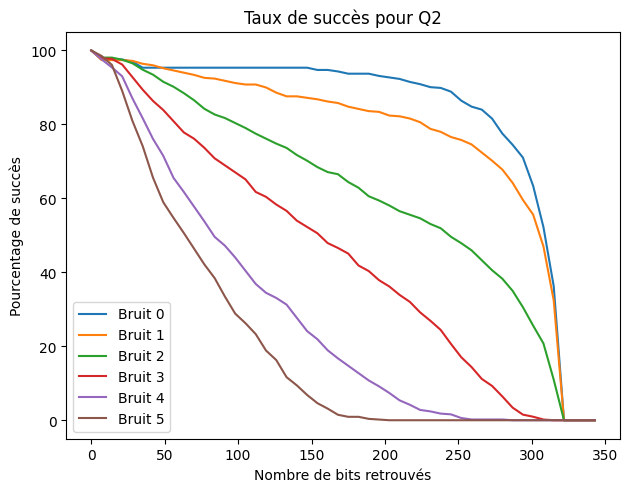

In [351]:
plt.plot(x,bruit_0_q2,label = "Bruit 0")
plt.plot(x,bruit_1_q2,label = "Bruit 1")
plt.plot(x,bruit_2_q2,label = "Bruit 2")
plt.plot(x,bruit_3_q2,label = "Bruit 3")
plt.plot(x,bruit_4_q2,label = "Bruit 4")
plt.plot(x,bruit_5_q2,label = "Bruit 5")

plt.xlabel("Nombre de bits retrouvés")
plt.ylabel("Pourcentage de succès")
plt.legend()
plt.tight_layout()
plt.title("Taux de succès pour Q2")

plt.show()

### Quartile Q3

In [352]:
bruit_0_q3 = [probabilite(i,liste_nb_bits_bruit_0_q3) for i in x]
bruit_1_q3 = [probabilite(i,liste_nb_bits_bruit_1_q3) for i in x]
bruit_2_q3 = [probabilite(i,liste_nb_bits_bruit_2_q3) for i in x]
bruit_3_q3 = [probabilite(i,liste_nb_bits_bruit_3_q3) for i in x]
bruit_4_q3 = [probabilite(i,liste_nb_bits_bruit_4_q3) for i in x]
bruit_5_q3 = [probabilite(i,liste_nb_bits_bruit_5_q3) for i in x]

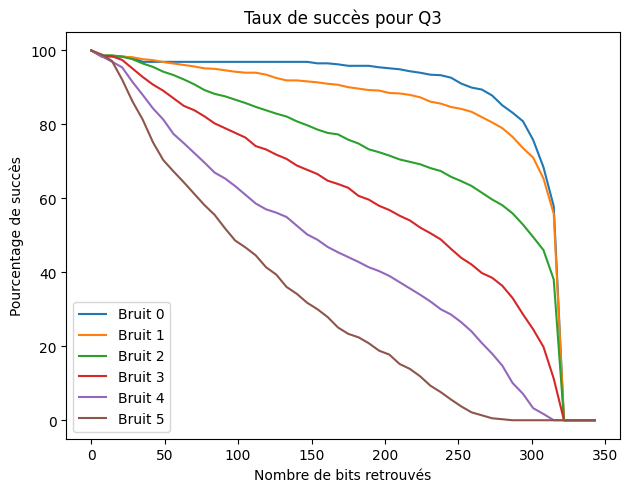

In [353]:
plt.plot(x,bruit_0_q3,label = "Bruit 0")
plt.plot(x,bruit_1_q3,label = "Bruit 1")
plt.plot(x,bruit_2_q3,label = "Bruit 2")
plt.plot(x,bruit_3_q3,label = "Bruit 3")
plt.plot(x,bruit_4_q3,label = "Bruit 4")
plt.plot(x,bruit_5_q3,label = "Bruit 5")

plt.xlabel("Nombre de bits retrouvés")
plt.ylabel("Pourcentage de succès")
plt.legend()
plt.tight_layout()
plt.title("Taux de succès pour Q3")

plt.show()

### Succès (du point de vue d'un attaquant externe)

In [354]:
with open("stats_attaque",'r') as fichier :
    lignes2 = fichier.readlines()

In [355]:
x = [float(element.split()[0]) for element in lignes2]
y = [float(element.split()[1]) for element in lignes2]

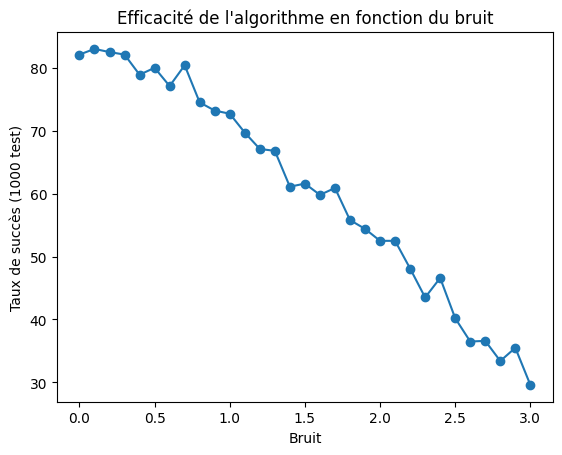

In [356]:
plt.title("Efficacité de l'algorithme en fonction du bruit")
plt.xlabel("Bruit")
plt.ylabel("Taux de succès (1000 test)")
plt.plot(x,y,marker="o")